In [1]:
import yfinance as yf

In [2]:
#msft = yf.Ticker("MSFT")
#msft_hist = msft.history(period="max")

In [3]:
import os
import pandas as pd

In [4]:
MSFT_DATA_PATH = "msft_data.json"

if os.path.exists(MSFT_DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(MSFT_DATA_PATH) as f:
        msft_hist = pd.read_json(MSFT_DATA_PATH)
else:
    msft = yf.Ticker("MSFT")
    msft_hist = msft.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    msft_hist.to_json(MSFT_DATA_PATH)

In [5]:
BTC_DATA_PATH = "btc_data.json"

if os.path.exists(BTC_DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(BTC_DATA_PATH) as f:
        btc_hist = pd.read_json(BTC_DATA_PATH)
else:
    btc = yf.Ticker("BTC-USD")
    btc_hist = btc.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    btc_hist.to_json(BTC_DATA_PATH)

In [6]:
btc_hist.tail(7)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-31 00:00:00+00:00,28032.261719,28639.896484,27583.714844,28478.484375,19001327598,0.0,0.0
2023-04-01 00:00:00+00:00,28473.332031,28802.457031,28297.171875,28411.035156,10876469901,0.0,0.0
2023-04-02 00:00:00+00:00,28462.845703,28518.958984,27884.087891,28199.308594,12284641999,0.0,0.0
2023-04-03 00:00:00+00:00,28183.080078,28475.623047,27276.720703,27790.220703,19556501327,0.0,0.0
2023-04-04 00:00:00+00:00,27795.273438,28433.742188,27681.304688,28168.089844,15284538859,0.0,0.0
2023-04-05 00:00:00+00:00,28169.726562,28739.238281,27843.763672,28177.984375,17052315986,0.0,0.0
2023-04-06 00:00:00+00:00,28158.175781,28158.175781,27776.509766,27941.425781,16293291008,0.0,0.0


In [12]:
msft_hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0
1986-03-20 00:00:00-05:00,0.061198,0.061198,0.059032,0.059574,58435200,0.0,0.0
1986-03-21 00:00:00-05:00,0.059574,0.060657,0.056866,0.057949,59990400,0.0,0.0
1986-03-24 00:00:00-05:00,0.057949,0.057949,0.055783,0.056324,65289600,0.0,0.0
1986-03-25 00:00:00-05:00,0.056324,0.057407,0.055783,0.057407,32083200,0.0,0.0


<Axes: xlabel='Date'>

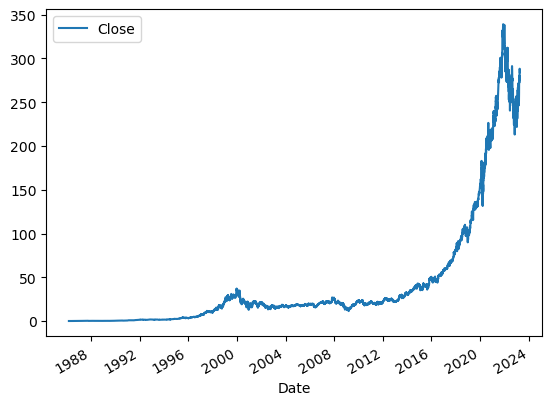

In [8]:
# Visualize microsoft stock prices
msft_hist.plot.line(y="Close", use_index=True)

<Axes: xlabel='Date'>

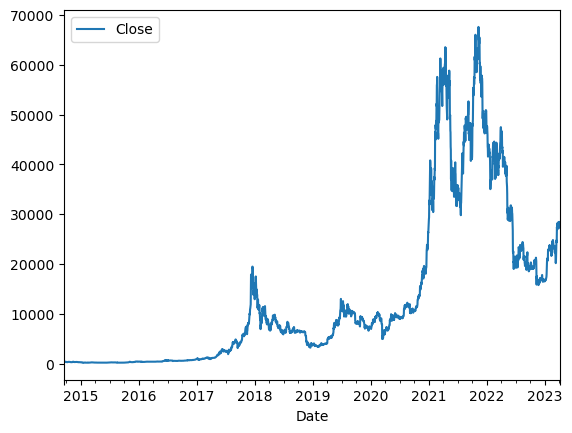

In [9]:
# Visualize BTC prices
btc_hist.plot.line(y="Close", use_index=True)

In [18]:
# Ensure we know the actual closing price
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
data.head(10)

,Actual_Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060657,NaN
1986-03-14 00:00:00-05:00,0.062823,1.0
1986-03-17 00:00:00-05:00,0.063907,1.0
1986-03-18 00:00:00-05:00,0.062281,0.0
1986-03-19 00:00:00-05:00,0.061198,0.0
1986-03-20 00:00:00-05:00,0.059574,0.0
1986-03-21 00:00:00-05:00,0.057949,0.0
1986-03-24 00:00:00-05:00,0.056324,0.0
1986-03-25 00:00:00-05:00,0.057407,1.0


In [19]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,6.776640e+07,0.0,0.0


In [20]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(msft_prev[predictors]).iloc[1:]
data.head()

,Actual_Close,Target,Close,Volume,Open,High,Low
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062823,1.0,0.060657,1.031789e+09,0.055241,0.063365,0.055241
1986-03-17 00:00:00-05:00,0.063907,1.0,0.062823,3.081600e+08,0.060657,0.063907,0.060657
1986-03-18 00:00:00-05:00,0.062281,0.0,0.063907,1.331712e+08,0.062823,0.064448,0.062823
1986-03-19 00:00:00-05:00,0.061198,0.0,0.062281,6.776640e+07,0.063907,0.064448,0.061740
1986-03-20 00:00:00-05:00,0.059574,0.0,0.061198,4.789440e+07,0.062281,0.062823,0.060657


In [21]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [22]:
# Create a train and test set
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [23]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5396825396825397

<Axes: xlabel='Date'>

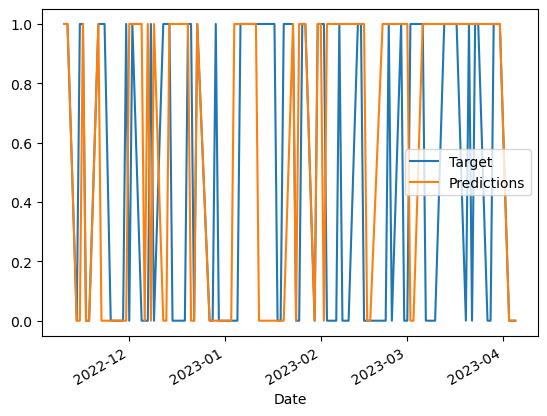

In [24]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [25]:
i = 1000
step = 750

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])

In [27]:
preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0


In [28]:
preds.head(10)

Date
1990-02-27 00:00:00-05:00    1.0
1990-02-28 00:00:00-05:00    1.0
1990-03-01 00:00:00-05:00    1.0
1990-03-02 00:00:00-05:00    1.0
1990-03-05 00:00:00-05:00    1.0
1990-03-06 00:00:00-05:00    1.0
1990-03-07 00:00:00-05:00    1.0
1990-03-08 00:00:00-05:00    0.0
1990-03-09 00:00:00-05:00    1.0
1990-03-12 00:00:00-05:00    1.0
dtype: float64

In [29]:
predictions = []
# Loop over the dataset in increments
for i in range(1000, data.shape[0], step):
    # Split into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Fit the random forest model
    model.fit(train[predictors], train["Target"])

    # Make predictions
    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

predictions[0].head()    


,Target,Predictions
Date,,
1990-02-27 00:00:00-05:00,0.0,1.0
1990-02-28 00:00:00-05:00,1.0,1.0
1990-03-01 00:00:00-05:00,1.0,1.0
1990-03-02 00:00:00-05:00,1.0,1.0
1990-03-05 00:00:00-05:00,1.0,1.0


In [30]:
predictions[0]

,Target,Predictions
Date,,
1990-02-27 00:00:00-05:00,0.0,1.0
1990-02-28 00:00:00-05:00,1.0,1.0
1990-03-01 00:00:00-05:00,1.0,1.0
1990-03-02 00:00:00-05:00,1.0,1.0
1990-03-05 00:00:00-05:00,1.0,1.0
...,...,...
1993-02-05 00:00:00-05:00,1.0,1.0
1993-02-08 00:00:00-05:00,0.0,1.0
1993-02-09 00:00:00-05:00,0.0,1.0


In [31]:
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [32]:
predictions = backtest(data, model, predictors)

In [33]:
predictions["Predictions"].value_counts()

0.0    7597
1.0     744
Name: Predictions, dtype: int64

In [34]:
predictions["Target"].value_counts()

1.0    4220
0.0    4121
Name: Target, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5040322580645161

In [36]:
weekly_mean = data.rolling(7).mean()["Close"]
quarterly_mean = data.rolling(90).mean()["Close"]
annual_mean = data.rolling(365).mean()["Close"]

In [37]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]

In [38]:
# First, we'll add the ratios between the weekly, quarterly, and annual means to the close:
data["weekly_mean"] = weekly_mean / data["Close"]
data["quarterly_mean"] = quarterly_mean / data["Close"]
data["annual_mean"] = annual_mean / data["Close"]

In [39]:
# Next, we'll add in the ratios between different rolling means. 
# This helps the algorithm understand what the weekly trend is relative to the annual trend.

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]

In [40]:
# Next, we'll add our weekly trend into the predictor DataFrame.
data["weekly_trend"] = weekly_trend

In [41]:
data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [42]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio"]


In [43]:
# Updating our predictions

predictions = backtest(data.iloc[365:], model, full_predictors)

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5761194029850746

In [45]:
# Show how many trades we would make

predictions["Predictions"].value_counts()

0.0    7641
1.0     335
Name: Predictions, dtype: int64

<Axes: xlabel='Date'>

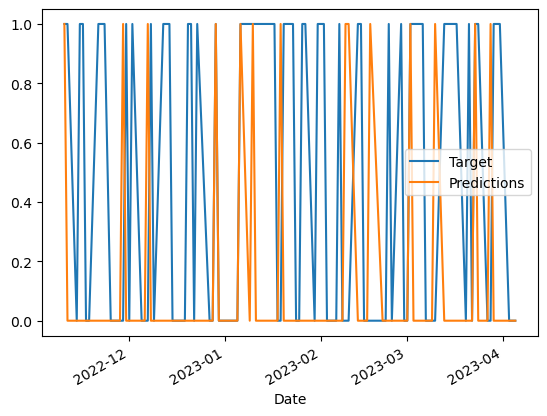

In [46]:
predictions.iloc[-100:].plot()